In [1]:
import illustris_python as il
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import random
import matplotlib.patches as patches
import numpy as np
from scipy import integrate
from scipy.optimize import fsolve
import os,matplotlib
import time,pickle,_pickle
import matplotlib.pyplot as plt
from matplotlib.pylab import rc
import os
import h5py
import math
import os.path
import tensorflow as tf
import keras
import csv
import pickle
tf.enable_eager_execution()
tf.VERSION
AUTOTUNE = tf.data.experimental.AUTOTUNE



def log10(x):
    if x > 0:
        return math.log10(x)
    else:
        return -np.inf


def exp(x):
    try:
        return math.exp(x)
    except:
        return np.inf


# calculate L_lim:
M_sun = 4.53
M_apparent_lim = 24

# distance in pc:
distance = 324.67 * 1e6

# apparent magnitude
M_lim = 24 - 5 * (log10(distance) - 1)
# print(M_lim)
M_sun = 4.53
# L_lim in unit of L_sun

L_lim = 10 ** ((M_lim - M_sun) / (-2.5))


# r band magnitude
def M_to_L_r_band(Mr):
    return 10 ** ((Mr - M_sun) / (-2.5))


def log10(x):
    if x > 0:
        return math.log10(x)
    else:
        return np.nan

def box_smooth(data_array):
    N = len(data_array)

    data_smooth = []

    for i in range(0, N):
        data_i = data_array[int(np.maximum(i - 1, 0)):int(np.minimum(i + 2, N))]
        # print(np.nanmean(data_i))

        data_smooth.append(np.nanmean(data_i))

    data_smooth = np.array(data_smooth).ravel()
    data_smooth[0] = np.nanmedian(data_array[:1])
    return data_smooth

def bootstrap_scatter_err(samples):
    mask_finite = np.isfinite(samples)
    samples = samples[mask_finite]
    index_all = range(len(samples))
    err_all = []
    N=100
    for i in range(0,N):
        index_choose = np.random.randint(0,len(samples)-1,len(samples))
        # k_i = np.nanstd(samples[index_choose])
        k_i = np.percentile(samples[index_choose],84)-np.percentile(samples[index_choose],16)
        k_i = k_i/2
        err_all.append(k_i)
    err_all = np.array(err_all)
    if len(samples)<0:
        err_all = np.nan

    return err_all


def exp(x):
    try:
        return math.exp(x)
    except:
        return np.inf

def Mpeak_log_to_Vpeak_log(Mpeak_log):
    return 0.3349*Mpeak_log - 1.672

G = 4.301 * 10 ** (-9)
cons = (4 * G * np.pi / (3 * (1 / 24 / (1.5 * 10 ** (11))) ** (1 / 3))) ** 0.5


def calculate_v_dispersion(Mh):
    return Mh ** (1 / 3) * cons


exp = np.vectorize(exp)
log10 = np.vectorize(log10)

####!!!!!!! here are some extreme values:
## Let's use 99 percent of data:


def normalize(x,return_maxmin=False):

    temp_max = np.nanpercentile(x,99)
    temp_min = np.nanpercentile(x, 1)

    if return_maxmin:
        return 2 * (x - temp_min) / (temp_max - temp_min) - 1,temp_max,temp_min
    else:
        return 2 * (x - temp_min) / (temp_max - temp_min) - 1



plot_path = "/Users/caojunzhi/Downloads/upload_201909_Jeremy/"


if os.path.isdir("/Volumes/SSHD_2TB") == True:
    print("The code is on Spear of Adun")

    ## Move to Data_10TB
    data_path = "/Volumes/Data_10TB/"

elif os.path.isdir("/mount/sirocco1/jc6933/test") == True:
    data_path = "/mount/sirocco2/jc6933/Data_sirocco/"
    print("The code is on Sirocco")

# Kratos
elif os.path.isdir("/home/jc6933/test_kratos") == True:
    data_path = "/mount/kratos/jc6933/Data/"
    print("The code is on Kratos")

# Void Seeker
elif os.path.isdir("/home/jc6933/test_Void_Seeker") == True:
    data_path = "/mount/Void_Seeker/Data_remote/"
    print("The code is on Void Seeker")

### PRINCE:
elif os.path.isdir("/home/jc6933/test_folder_prince") == True:
    data_path = "/scratch/jc6933/"
    print("The code is on PRINCE")

else:
    print("The code is on local")
    data_path = "/Volumes/Extreme_SSD/Data/"

print("data_path %s" % data_path)


N_snap_shot = []
N_redshift = []
# data_path+"TNG100/TNG100-1/url/" + "TNG100_information_csv.csv"
with open(data_path+"TNG100/TNG100-1/url/" + "TNG100_information_csv.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    for i, row in enumerate(csv_reader):
        if i > 2:
            N_snap_shot.append(row[1])
            N_redshift.append(row[2])

N_snap_shot = np.array(N_snap_shot, dtype=int)[::-1]
N_redshift = np.array(N_redshift, dtype=float)[::-1]




The code is on Void Seeker
data_path /mount/Void_Seeker/Data_remote/


Using TensorFlow backend.


# Read TNG data at different redshifts

In [2]:
# Let's read data from TNG:

# z=0:

# n_group = 99

# read TNG300/TNG100:


def read_data_at_z(n_group):
    fields = ['GroupBHMass', "Group_M_Crit200", "GroupFirstSub","Group_R_Crit200","GroupSFR","GroupCM"]
    basePath = data_path + 'TNG100/TNG100-1/output'
    halos = il.groupcat.loadHalos(basePath, n_group, fields=fields)
    halos.keys()

    GroupBHMass = halos['GroupBHMass'] * 1e10 / 0.704
    Group_M_Crit200 = halos["Group_M_Crit200"] * 1e10 / 0.704
    GroupFirstSub = halos["GroupFirstSub"]
    R_vir_z0 = halos["Group_R_Crit200"] / 0.704
    GroupSFR = halos["GroupSFR"]
    GroupCM = halos["GroupCM"]
    ### for subhalo
    # Use this to derive the index for the subhalo:
    # Index into the Group table of the FOF host/parent of this Subhalo.

    fields = ['SubhaloMass', 'SubhaloSFR', "SubhaloVmax", "SubhaloStellarPhotometricsMassInRad", "SubhaloBHMass",
              "SubhaloGrNr", "SubhaloSpin", "SubhaloVelDisp", "SubhaloStellarPhotometrics", "SubhaloCM",
              "SubhaloStarMetalFractions"]

    basePath = data_path + 'TNG100/TNG100-1/output'
    subhalos = il.groupcat.loadSubhalos(basePath, n_group, fields=fields)
    subhalos.keys()

    mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
    Vmax = subhalos['SubhaloVmax']
    SubhaloStellarPhotometricsMassInRad = subhalos['SubhaloStellarPhotometricsMassInRad'] * 1e10 / 0.704
    SubhaloStellarPhotometrics = subhalos['SubhaloStellarPhotometrics']
    SubhaloBHMass = subhalos["SubhaloBHMass"] * 1e10 / 0.704
    SubhaloCM = subhalos["SubhaloCM"]
    SubhaloVelDisp = subhalos["SubhaloVelDisp"]
    SubhaloStarMetalFractions = subhalos["SubhaloStarMetalFractions"]
    SubhaloSFR = subhalos["SubhaloSFR"]
    # index
    SubhaloGrNr = subhalos["SubhaloGrNr"]
    
    # Use group first sub to detect central or satellites:
    # If the index is -1, it's not what we need:
    mask_central = list(set(GroupFirstSub)-set([-1]))
    mask_sat = set(np.arange(0,len(SubhaloSFR)-1))-set(GroupFirstSub)
    mask_sat = list(mask_sat)
    print("There are %d central and %d satellite at snapshot %d"%(len(Vmax[mask_central]),len(Vmax[mask_sat]),n_group))

    # use log scale in both Ms and SFR!
    fusion_all = np.c_[log10(SubhaloStellarPhotometricsMassInRad), log10(SubhaloSFR), log10(Vmax), log10(
        SubhaloVelDisp), SubhaloStellarPhotometrics, log10(SubhaloStarMetalFractions)]
    fusion_central = fusion_all[mask_central, :]
    fusion_sat = fusion_all[mask_sat, :]
    fusion_all = np.r_[fusion_central,fusion_sat]
    
    p_cen = np.append(np.ones(len(mask_central)), np.zeros(len(mask_sat)))
    z_array = np.ones(len(p_cen))*N_redshift[abs(N_snap_shot-n_group)<0.01]
    return np.c_[z_array,fusion_all,p_cen]


    
    
    
#output = read_data_at_z(n_group=80)

output_all = []
count=0
snap_target = [25,33,40,50,56,63,72,84,99]

for i in snap_target:
    print("Reading group %d"%i)
    if count==0:
        output_all=read_data_at_z(n_group=i)
    else:
        output_all = np.r_[output_all,read_data_at_z(n_group=i)]
    count+=1

    
print("Finish reading data")
output_all = np.array(output_all)


Reading group 25
There are 4974189 central and 854595 satellite at snapshot 25
Reading group 33
There are 4662592 central and 958746 satellite at snapshot 33
Reading group 40
There are 4439604 central and 979623 satellite at snapshot 40
Reading group 50
There are 4156866 central and 970428 satellite at snapshot 50
Reading group 56
There are 4021585 central and 960559 satellite at snapshot 56
Reading group 63
There are 3887145 central and 951071 satellite at snapshot 63
Reading group 72
There are 3743277 central and 942045 satellite at snapshot 72
Reading group 84
There are 3587970 central and 939157 satellite at snapshot 84
Reading group 99
There are 3430706 central and 940505 satellite at snapshot 99
Finish reading data


In [3]:
output_all.shape

(45400663, 24)

(array([ 8496729.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 36903934.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

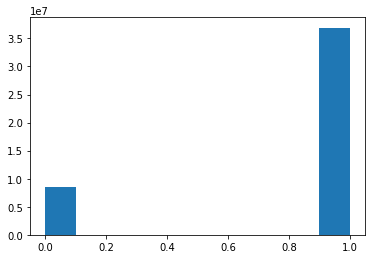

In [4]:
plt.hist(output_all[:,-1])

# Let's construct central and satellite using p_cen: p_cen=1 for central and p_cen=0 for satellites

# Include Ms, SFR, SubhaloStellarPhotometrics (8), and metallicity (10)

In [5]:
X = output_all[:,:-1]
y = output_all[:,-1]

## only select samples with logMs>1e8 ?

# fit diffeent model for different logMs
mask_7 = (X[:,1]>8)&(X[:,1]<10)
X = X[mask_7,:]
y = y[mask_7]





In [6]:
y.shape

(184060,)

(array([ 82724.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 101336.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

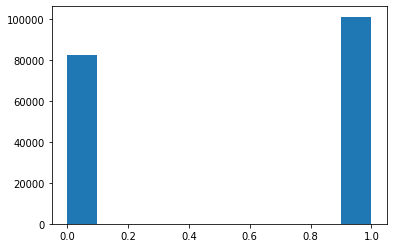

In [7]:
# sanity check
plt.hist(y)

# split train and test. Do shuffle:

In [8]:
temp = abs(y)<0.1
print(len(y),len(y[temp]))

184060 82724


In [9]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2,shuffle=True)

# Let's start with a gradient boost tree:


In [10]:
### XGBOOST:
import time
# try xgboost:
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
# add redshift
label_names = ["redshift","Ms_log","SFR_log","Vmax_log","V_disp_log","U", "B", "V", "K", "g", "r", "i", "z","H", "He", "C", "N", "O", "Ne", "Mg", "Si", "Fe", "total_metallicity"]


In [11]:

time_start = time.time()
params={}
params['booster'] = "gbtree"
#params['learning_rate'] = 0.02
###params['max_depth'] = 12
params['gpu_id'] = 0
#params["subsample"] = 0.85
params['max_bin'] = 512
params['tree_method'] = 'gpu_hist'

## Add a combination of L1 and L2 regularization will help us to prevent overfitting

# L1 regularization
#params['reg_alpha'] = 0.15
# L2 regularization
#params['reg_lamdba'] = 0.85


model = XGBClassifier(n_estimators=5000,verbose=2,n_jobs=-1,**params)
print("Doing gradient boost tree with GPU")
X_train = pd.DataFrame(data=X_train, columns=label_names)
model.fit(X_train,y_train)
# predict:


print("Time it takes using GPU=%.2f"%(time.time()-time_start))


X_test = pd.DataFrame(data=X_test, columns=label_names)
Y_predict_test = model.predict(X_test)

mask_good = abs(Y_predict_test-y_test)<0.01

print("Good=%d Bad=%d"%(len(Y_predict_test[mask_good]),len(Y_predict_test)-len(Y_predict_test[mask_good])))

print("Accuracy=%.4f for testing set"%(len(Y_predict_test[mask_good])/len(Y_predict_test)))



Doing gradient boost tree with GPU
Time it takes using GPU=24.98
Good=31659 Bad=5153
Accuracy=0.8600 for testing set


AUROC: 0.9197


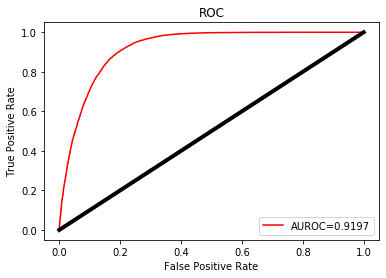

In [12]:
# plot AUROC curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib
from matplotlib.pylab import rc


def confusion_matrix(y_pred, y_true):
    TP = len(y_pred[(y_pred == 1) & (y_true == 1)])
    TN = len(y_pred[(y_pred == 1) & (y_true == 0)])
    # type1 error : false alarm
    FP = len(y_pred[(y_pred == 1) & (y_true == 0)])
    # type 2 error. Fail to make alarm
    FN = len(y_pred[(y_pred == 0) & (y_true == 1)])

    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / len(y_pred)

    f1_score = 2 / (1 / precision + 1 / recall)
    return TP, TN, FP, FN, recall, precision, accuracy, f1_score


testy = y_test
prob = model.predict_proba(X_test)
probs = prob[:, 1]

auc = roc_auc_score(testy, probs)
print('AUROC: %.4f' % auc)

## draw ROC:
fpr, tpr, thresholds = roc_curve(testy, probs)


plt.plot(fpr, tpr, color='r', label='AUROC=%.4f' % auc)
plt.plot([0, 1], [0, 1], color='k', linewidth=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()


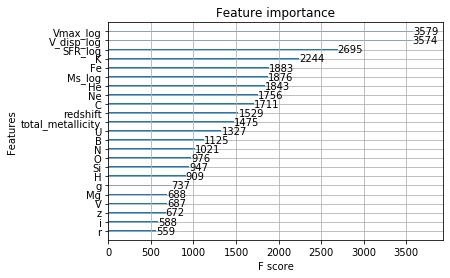

In [13]:
# plot the importance for different parameters:
plot_importance(model)

([array([16457.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 20355.]),
  array([14182.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 22630.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

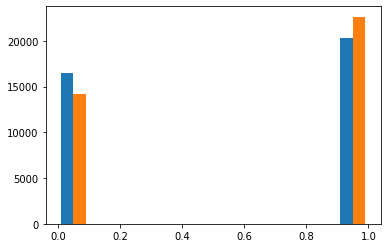

In [14]:
# histogram of y_test and y_predicted:
plt.hist(np.c_[y_test,Y_predict_test])


(array([9859., 1155.,  967., 1022., 1175., 1552., 2120., 3731., 6523.,
        8708.]),
 array([3.8523128e-17, 9.9946029e-02, 1.9989206e-01, 2.9983810e-01,
        3.9978412e-01, 4.9973014e-01, 5.9967619e-01, 6.9962221e-01,
        7.9956824e-01, 8.9951426e-01, 9.9946028e-01], dtype=float32),
 <a list of 10 Patch objects>)

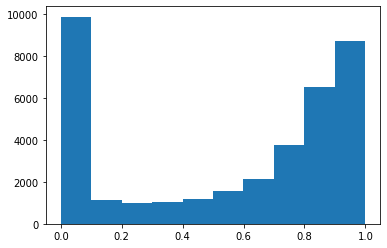

In [15]:
plt.hist(probs)

In [16]:
# also try NN:


# k mean clustering:
# Use this to pre-process the data and make ensemble modeling

In [17]:
from sklearn.cluster import KMeans


X = output_all[:,:-1]
y = output_all[:,-1]

mask_7 = (X[:,1]>7)
X = X[mask_7,:]
y = y[mask_7]




kmeans = KMeans(n_clusters=4,n_jobs=-1)
mask_finite = np.isfinite(np.sum(X,axis=1))
kmeans.fit(X[mask_finite,:])
y_kmeans = kmeans.predict(X[mask_finite,:])

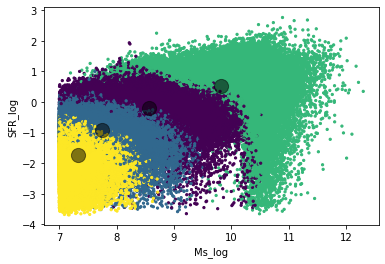

In [18]:
# check clustering properties:
# now name 0 is the redshift
x_name = 1
y_name = 2


plt.scatter(X[mask_finite, x_name], X[mask_finite, y_name], c=y_kmeans, s=5, cmap='viridis')
plt.xlabel("%s"%label_names[x_name])
plt.ylabel("%s"%label_names[y_name])
centers = kmeans.cluster_centers_
plt.scatter(centers[:, x_name], centers[:, y_name], c='black', s=200, alpha=0.5)

In [19]:
# Find best k:
# Also scale to 0-1 for all values
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X[mask_finite,:])
data_transformed = mms.transform(X[mask_finite,:])

Sum_of_squared_distances = []
K = np.arange(1,15)
for k in K:
    print("Doing %d of %d"%(k,len(K)))
    km = KMeans(n_clusters=k,n_jobs=-1)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

Doing 1 of 14
Doing 2 of 14
Doing 3 of 14
Doing 4 of 14
Doing 5 of 14
Doing 6 of 14
Doing 7 of 14
Doing 8 of 14
Doing 9 of 14
Doing 10 of 14
Doing 11 of 14
Doing 12 of 14
Doing 13 of 14
Doing 14 of 14


Text(0, 0.5, 'sum of squared distance in group')

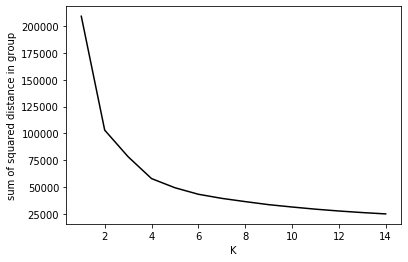

In [20]:
# plot:
plt.plot(K,Sum_of_squared_distances,"k")
plt.xlabel("K")
plt.ylabel("sum of squared distance in group")

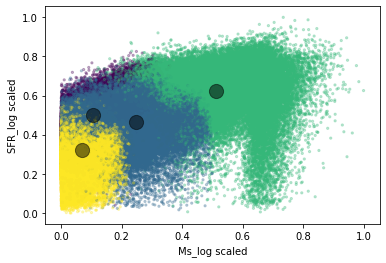

In [21]:
# Choose group k=elbow:

kmeans = KMeans(n_clusters=4,n_jobs=-1)

kmeans.fit(data_transformed)
y_kmeans = kmeans.predict(data_transformed)
# check clustering properties:

x_name = 1
y_name = 2


plt.scatter(data_transformed[:, x_name], data_transformed[:, y_name], c=y_kmeans, s=5, cmap='viridis', alpha=0.3)
plt.xlabel("%s scaled"%label_names[x_name])
plt.ylabel("%s scaled"%label_names[y_name])
centers = kmeans.cluster_centers_
plt.scatter(centers[:, x_name], centers[:, y_name], c='black', s=200, alpha=0.5)

### 

# Let's try k clustring first, and Do xgboost in these clusters:
Coming soon!